In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
ds = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [3]:
ds.shape

(5572, 5)

In [4]:
ds.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
ds.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [8]:
ds.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [9]:
ds.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
ds.rename(columns = {"v1":"Type", "v2":"Text"}, inplace = True)

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
ds['Tokenized_Message'] = ds['Text'].apply(word_tokenize)

print(ds[['Text', 'Tokenized_Message']])

                                                   Text  \
0     Go until jurong point, crazy.. Available only ...   
1                         Ok lar... Joking wif u oni...   
2     Free entry in 2 a wkly comp to win FA Cup fina...   
3     U dun say so early hor... U c already then say...   
4     Nah I don't think he goes to usf, he lives aro...   
...                                                 ...   
5567  This is the 2nd time we have tried 2 contact u...   
5568              Will Ì_ b going to esplanade fr home?   
5569  Pity, * was in mood for that. So...any other s...   
5570  The guy did some bitching but I acted like i'd...   
5571                         Rofl. Its true to its name   

                                      Tokenized_Message  
0     [Go, until, jurong, point, ,, crazy, .., Avail...  
1              [Ok, lar, ..., Joking, wif, u, oni, ...]  
2     [Free, entry, in, 2, a, wkly, comp, to, win, F...  
3     [U, dun, say, so, early, hor, ..., U, c, alrea...  
4

In [16]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [17]:
ds['Cleaned_Message'] = ds['Tokenized_Message'].apply(
    lambda tokens: [
        stemmer.stem(word.lower()) for word in tokens
        if word.lower() not in stop_words and word not in string.punctuation
    ]
)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features
features = vectorizer.fit_transform(ds['Cleaned_Message'].apply(lambda x: ' '.join(x)))
features_df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())

In [19]:
ds.head()

,Type,Text,Tokenized_Message,Cleaned_Message
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, jurong, point, crazi, .., avail, bugi, n,..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, earli, hor, ..., u, c, alreadi, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, n't, think, goe, usf, live, around, though]"


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ds['type'] = label_encoder.fit_transform(ds['Type'])

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(ds['Cleaned_Message'].apply(lambda tokens: ' '.join(tokens))).toarray()

x.dtype

y = ds['type']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

y_pred_MNB = nb_model.predict(x_test)

print(classification_report(y_pred_MNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9640    0.9817      1001
           1     0.7600    1.0000    0.8636       114

    accuracy                         0.9677      1115
   macro avg     0.8800    0.9820    0.9227      1115
weighted avg     0.9755    0.9677    0.9696      1115



In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_GNB = gnb.predict(x_test)

print(classification_report(pred_GNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.8663    0.9835    0.9212       850
           1     0.9067    0.5132    0.6554       265

    accuracy                         0.8717      1115
   macro avg     0.8865    0.7484    0.7883      1115
weighted avg     0.8759    0.8717    0.8580      1115



In [25]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
pred_BNB = bnb.predict(x_test)
print(classification_report(pred_BNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9969    0.9766    0.9867       985
           1     0.8467    0.9769    0.9071       130

    accuracy                         0.9767      1115
   macro avg     0.9218    0.9768    0.9469      1115
weighted avg     0.9794    0.9767    0.9774      1115



In [26]:
!pip install xgboost
from xgboost import XGBClassifier

In [27]:
xgb_clf = XGBClassifier()
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=1, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_clf.fit(x_train, y_train)
pred_X = bnb.predict(x_test)
print(classification_report(pred_X, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9969    0.9766    0.9867       985
           1     0.8467    0.9769    0.9071       130

    accuracy                         0.9767      1115
   macro avg     0.9218    0.9768    0.9469      1115
weighted avg     0.9794    0.9767    0.9774      1115



In [28]:
from sklearn.ensemble import RandomForestClassifier as RF

rdF = RF(n_estimators=20, max_depth=100,random_state=64)
rdF.fit(x_train, y_train)
pred_RF = rdF.predict(x_test)
print(classification_report(pred_RF, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9990    0.9807    0.9897       983
           1     0.8733    0.9924    0.9291       132

    accuracy                         0.9821      1115
   macro avg     0.9361    0.9865    0.9594      1115
weighted avg     0.9841    0.9821    0.9826      1115



[Text(0.9640579710144928, 0.995049504950495, 'local <= 0.12\ngini = 0.217\nsamples = 2815\nvalue = [3905, 552]\nclass = ham'),
 Text(0.9578743961352657, 0.9851485148514851, 'txting <= 0.101\ngini = 0.215\nsamples = 2812\nvalue = [3905, 545]\nclass = ham'),
 Text(0.9609661835748793, 0.9900990099009901, 'True  '),
 Text(0.9281159420289855, 0.9752475247524752, '50 <= 0.077\ngini = 0.213\nsamples = 2806\nvalue = [3904, 537]\nclass = ham'),
 Text(0.8995169082125604, 0.9653465346534653, 'network <= 0.096\ngini = 0.197\nsamples = 2774\nvalue = [3900, 485]\nclass = ham'),
 Text(0.8732367149758454, 0.9554455445544554, 'current <= 0.166\ngini = 0.193\nsamples = 2760\nvalue = [3888, 471]\nclass = ham'),
 Text(0.8515942028985507, 0.9455445544554455, '10am <= 0.135\ngini = 0.189\nsamples = 2750\nvalue = [3886, 460]\nclass = ham'),
 Text(0.8454106280193237, 0.9356435643564357, '3030 <= 0.152\ngini = 0.187\nsamples = 2746\nvalue = [3886, 452]\nclass = ham'),
 Text(0.8392270531400966, 0.92574257425742

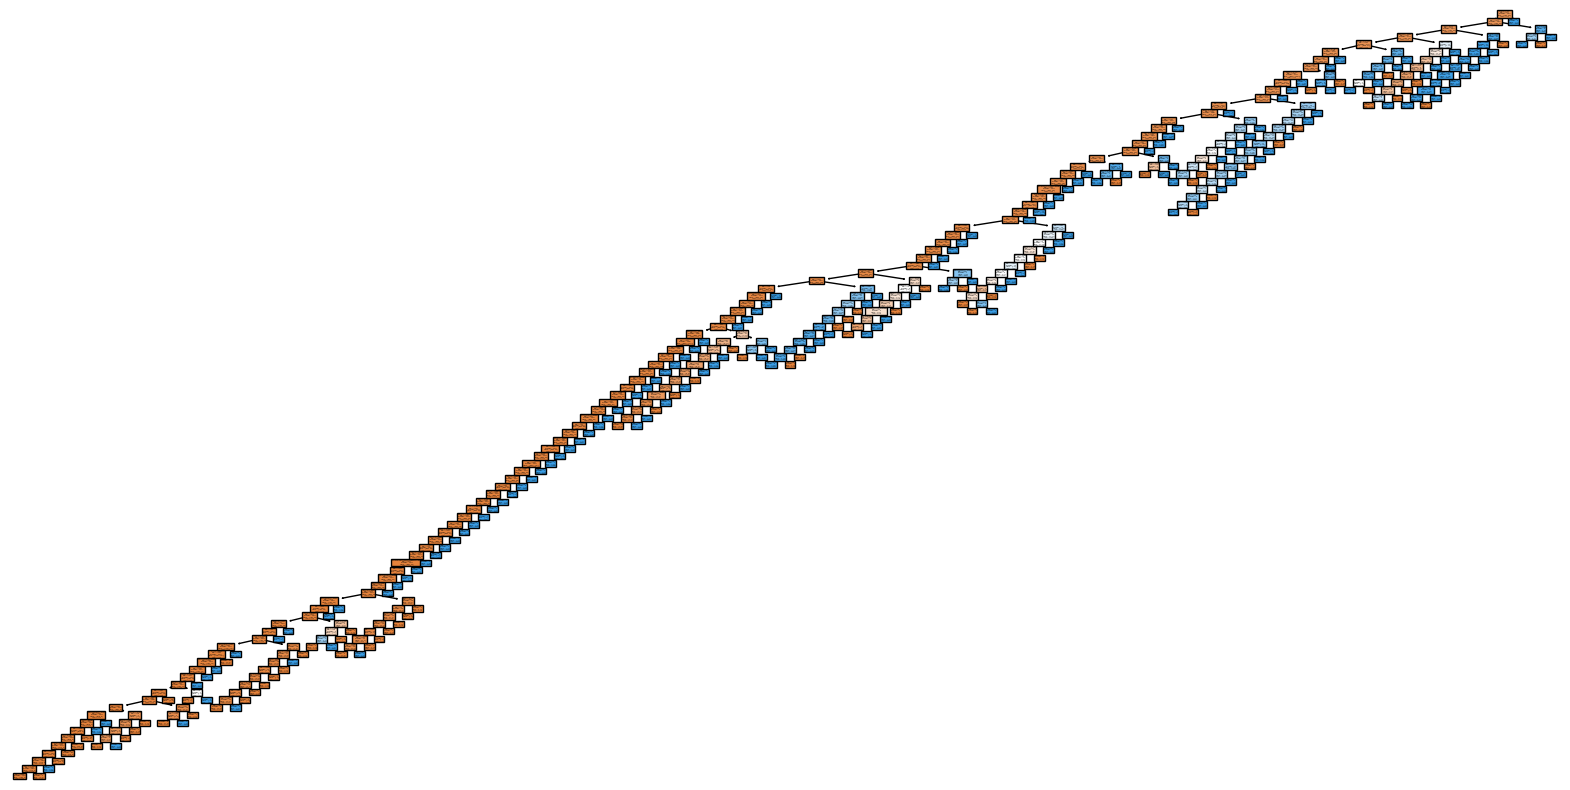

In [29]:
single_tree = rdF.estimators_[0]

plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(single_tree, filled=True, feature_names=tfidf.get_feature_names_out(), class_names=['ham', 'spam'])

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred_clf = clf.predict(x_test)

print(classification_report(pred_clf, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9865    0.9774    0.9819       974
           1     0.8533    0.9078    0.8797       141

    accuracy                         0.9686      1115
   macro avg     0.9199    0.9426    0.9308      1115
weighted avg     0.9697    0.9686    0.9690      1115



In [31]:
if isinstance(x, pd.DataFrame) or isinstance(x, np.ndarray):
    x = np.array(x)
if len(x.shape) == 1:
    x = x.reshape(-1, 1)
y = np.array(y).ravel()

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [33]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

y_pred_MNB = nb_model.predict(x_test)

print(classification_report(y_pred_MNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9817    0.9949    0.9882       972
           1     0.9947    0.9812    0.9879       958

    accuracy                         0.9881      1930
   macro avg     0.9882    0.9880    0.9881      1930
weighted avg     0.9882    0.9881    0.9881      1930



In [34]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_GNB = gnb.predict(x_test)

print(classification_report(pred_GNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.8640    1.0000    0.9270       851
           1     1.0000    0.8758    0.9338      1079

    accuracy                         0.9306      1930
   macro avg     0.9320    0.9379    0.9304      1930
weighted avg     0.9400    0.9306    0.9308      1930



In [35]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
pred_BNB = bnb.predict(x_test)
print(classification_report(pred_BNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9919    0.9960       993
           1     0.9915    1.0000    0.9957       937

    accuracy                         0.9959      1930
   macro avg     0.9958    0.9960    0.9959      1930
weighted avg     0.9959    0.9959    0.9959      1930



In [36]:
xgb_clf = XGBClassifier()
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=1, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_clf.fit(x_train, y_train)
pred_X = bnb.predict(x_test)
print(classification_report(pred_X, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9919    0.9960       993
           1     0.9915    1.0000    0.9957       937

    accuracy                         0.9959      1930
   macro avg     0.9958    0.9960    0.9959      1930
weighted avg     0.9959    0.9959    0.9959      1930



In [37]:
rdF = RF(n_estimators=20, max_depth=100,random_state=64)
rdF.fit(x_train, y_train)
pred_RF = rdF.predict(x_test)
print(classification_report(pred_RF, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9990    0.9919    0.9954       992
           1     0.9915    0.9989    0.9952       938

    accuracy                         0.9953      1930
   macro avg     0.9953    0.9954    0.9953      1930
weighted avg     0.9954    0.9953    0.9953      1930



In [38]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred_clf = clf.predict(x_test)

print(classification_report(pred_clf, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9624    0.9844    0.9733       963
           1     0.9841    0.9617    0.9728       967

    accuracy                         0.9731      1930
   macro avg     0.9733    0.9731    0.9731      1930
weighted avg     0.9733    0.9731    0.9731      1930



In [39]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [40]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_MNB = nb_model.predict(x_test)
print(classification_report(y_pred_MNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9172    0.9779    0.9466       136
           1     0.9805    0.9264    0.9527       163

    accuracy                         0.9498       299
   macro avg     0.9489    0.9522    0.9497       299
weighted avg     0.9517    0.9498    0.9499       299



In [41]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_GNB = gnb.predict(x_test)

print(classification_report(pred_GNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9034    0.9562    0.9291       137
           1     0.9610    0.9136    0.9367       162

    accuracy                         0.9331       299
   macro avg     0.9322    0.9349    0.9329       299
weighted avg     0.9347    0.9331    0.9332       299



In [42]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
pred_BNB = bnb.predict(x_test)
print(classification_report(pred_BNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.8841    0.9385       164
           1     0.8766    1.0000    0.9343       135

    accuracy                         0.9365       299
   macro avg     0.9383    0.9421    0.9364       299
weighted avg     0.9443    0.9365    0.9366       299



In [43]:
xgb_clf = XGBClassifier()
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=1, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_clf.fit(x_train, y_train)
pred_X = bnb.predict(x_test)
print(classification_report(pred_X, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.8841    0.9385       164
           1     0.8766    1.0000    0.9343       135

    accuracy                         0.9365       299
   macro avg     0.9383    0.9421    0.9364       299
weighted avg     0.9443    0.9365    0.9366       299



In [60]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred_clf = clf.predict(x_test)

print(classification_report(pred_clf, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9140    0.9599    0.9364       299
           1     0.9577    0.9097    0.9331       299

    accuracy                         0.9348       598
   macro avg     0.9359    0.9348    0.9347       598
weighted avg     0.9359    0.9348    0.9347       598



In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.naive_bayes import MultinomialNB
ham_weight = 747/5572
spam_weight = 4825/5572
mnb_model = MultinomialNB(class_prior=[ham_weight, spam_weight])
mnb = MultinomialNB(class_prior=[0.7, 0.3])
mnb.fit(x_train, y_train)

MultinomialNB(class_prior=[0.7, 0.3])

In [63]:
y_pred_MNB = nb_model.predict(x_test)
print(classification_report(y_pred_MNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9522    0.9676    0.9599       309
           1     0.9648    0.9481    0.9564       289

    accuracy                         0.9582       598
   macro avg     0.9585    0.9579    0.9581       598
weighted avg     0.9583    0.9582    0.9582       598



In [64]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
pred_GNB = gnb_model.predict_proba(x_test)
adjusted_proba = pred_GNB * [ham_weight, spam_weight]
adjusted_class_labels = np.argmax(adjusted_proba, axis=1)
print(classification_report(y_test, adjusted_class_labels, digits=4))

              precision    recall  f1-score   support

           0     0.9833    0.9363    0.9592       314
           1     0.9331    0.9824    0.9571       284

    accuracy                         0.9582       598
   macro avg     0.9582    0.9594    0.9582       598
weighted avg     0.9595    0.9582    0.9582       598



In [66]:
num_negatives = sum(y_train == 0)
num_positives = sum(y_train == 1)
scale_pos_weight = num_negatives / num_positives

xgb_clf = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.1,
    max_delta_step=0,
    max_depth=10,
    min_child_weight=1,
    missing=1,
    n_estimators=150,
    n_jobs=1,
    objective='binary:logistic',
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=scale_pos_weight,
    subsample=1,
    verbosity=1
)

xgb_clf.fit(x_train, y_train)
pred_X = xgb_clf.predict(x_test)

print(classification_report(y_test, pred_X, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9558    0.9650    0.9604       314
           1     0.9609    0.9507    0.9558       284

    accuracy                         0.9582       598
   macro avg     0.9583    0.9578    0.9581       598
weighted avg     0.9582    0.9582    0.9582       598



In [67]:
rdF = RF(
    n_estimators=20,
    max_depth=100,
    random_state=64,
    class_weight='balanced'
)

rdF.fit(x_train, y_train)

pred_RF = rdF.predict(x_test)
print(classification_report(y_test, pred_RF, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9572    0.9968    0.9766       314
           1     0.9963    0.9507    0.9730       284

    accuracy                         0.9749       598
   macro avg     0.9767    0.9738    0.9748       598
weighted avg     0.9758    0.9749    0.9749       598



In [68]:
clf = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

clf.fit(x_train, y_train)

pred_clf = clf.predict(x_test)

print(classification_report(y_test, pred_clf, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9637    0.9299    0.9465       314
           1     0.9254    0.9613    0.9430       284

    accuracy                         0.9448       598
   macro avg     0.9446    0.9456    0.9448       598
weighted avg     0.9455    0.9448    0.9448       598



In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
oversampler = SMOTE(sampling_strategy=1.0, random_state=42)
x_under, y_under = undersampler.fit_resample(x, y)
print(f"After undersampling: {Counter(y_under)}")

x_resampled, y_resampled = oversampler.fit_resample(x_under, y_under)
print(f"After oversampling: {Counter(y_resampled)}")

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

After undersampling: Counter({np.int64(0): 1494, np.int64(1): 747})
After oversampling: Counter({np.int64(0): 1494, np.int64(1): 1494})


In [55]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_MNB = nb_model.predict(x_test)
print(classification_report(y_pred_MNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9522    0.9676    0.9599       309
           1     0.9648    0.9481    0.9564       289

    accuracy                         0.9582       598
   macro avg     0.9585    0.9579    0.9581       598
weighted avg     0.9583    0.9582    0.9582       598



In [56]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred_GNB = gnb.predict(x_test)

print(classification_report(pred_GNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9363    0.9833    0.9592       299
           1     0.9824    0.9331    0.9571       299

    accuracy                         0.9582       598
   macro avg     0.9594    0.9582    0.9582       598
weighted avg     0.9594    0.9582    0.9582       598



In [69]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
pred_BNB = bnb.predict(x_test)
print(classification_report(pred_BNB, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9968    0.9456    0.9705       331
           1     0.9366    0.9963    0.9655       267

    accuracy                         0.9682       598
   macro avg     0.9667    0.9709    0.9680       598
weighted avg     0.9699    0.9682    0.9683       598



In [70]:
xgb_clf = XGBClassifier()
xgb_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=1, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_clf.fit(x_train, y_train)
pred_X = bnb.predict(x_test)
print(classification_report(pred_X, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9968    0.9456    0.9705       331
           1     0.9366    0.9963    0.9655       267

    accuracy                         0.9682       598
   macro avg     0.9667    0.9709    0.9680       598
weighted avg     0.9699    0.9682    0.9683       598



In [71]:
rdF = RF(n_estimators=20, max_depth=100,random_state=64)
rdF.fit(x_train, y_train)
pred_RF = rdF.predict(x_test)
print(classification_report(pred_RF, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9936    0.9571    0.9750       326
           1     0.9507    0.9926    0.9712       272

    accuracy                         0.9732       598
   macro avg     0.9722    0.9749    0.9731       598
weighted avg     0.9741    0.9732    0.9733       598



In [72]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

pred_clf = clf.predict(x_test)

print(classification_report(pred_clf, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9108    0.9565    0.9331       299
           1     0.9542    0.9064    0.9297       299

    accuracy                         0.9314       598
   macro avg     0.9325    0.9314    0.9314       598
weighted avg     0.9325    0.9314    0.9314       598

